In [1]:
from google.colab import drive
drive.mount ('/content/gdrive')
path = "/content/gdrive/MyDrive/Praktikum_ML/Latihan4"

Mounted at /content/gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, classification_report, RocCurveDisplay, ConfusionMatrixDisplay
)

In [3]:
df = pd.read_csv(path +'/data/calonpembelimobil.csv',sep=',')
df.head()

,ID,Usia,Status,Kelamin,Memiliki_Mobil,Penghasilan,Beli_Mobil
0,1,32,1,0,0,240,1
1,2,49,2,1,1,100,0
2,3,52,1,0,2,250,1
3,4,26,2,1,1,130,0
4,5,45,3,0,2,237,1


In [4]:
X = df[['Usia', 'Status', 'Kelamin', 'Memiliki_Mobil', 'Penghasilan']]
y = df['Beli_Mobil']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [7]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [8]:
y_pred = model.predict(X_test_scaled)
y_pred_prob = model.predict_proba(X_test_scaled)[:, 1]

In [9]:
print("Akurasi       :", accuracy_score(y_test, y_pred))
print("ROC AUC Score :", roc_auc_score(y_test, y_pred_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Akurasi       : 0.925
ROC AUC Score : 0.9646139705882353

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88        64
           1       0.94      0.96      0.95       136

    accuracy                           0.93       200
   macro avg       0.92      0.91      0.91       200
weighted avg       0.92      0.93      0.92       200



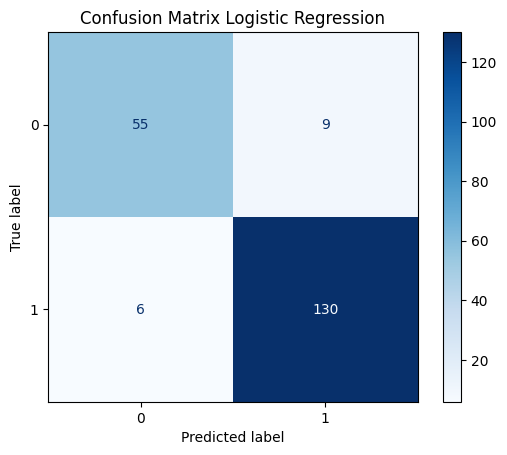

In [10]:
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot(cmap='Blues')
plt.title("Confusion Matrix Logistic Regression")
plt.show()

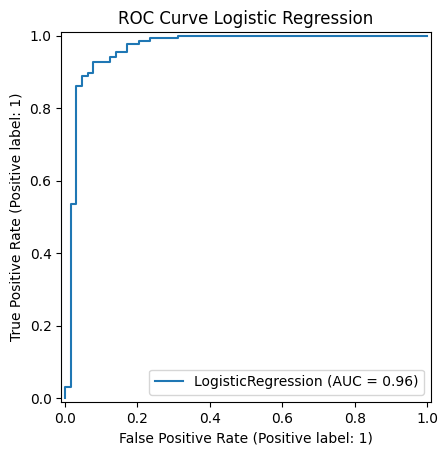

In [11]:
RocCurveDisplay.from_estimator(model, X_test_scaled, y_test)
plt.title("ROC Curve Logistic Regression")
plt.show()

In [13]:
data_baru = pd.DataFrame({
    "Usia": [28, 45],
    "Status": [1, 2],
    "Kelamin": [1, 0],
    "Memiliki_Mobil": [0, 1],
    "Penghasilan": [180, 230]
})

data_baru_scaled = scaler.transform(data_baru)
prediksi_baru = model.predict(data_baru_scaled)
prob_baru = model.predict_proba(data_baru_scaled)[:, 1]

data_baru["Probabilitas_Beli"] = prob_baru
data_baru["Prediksi_Beli_Mobil"] = prediksi_baru
print("\nData Baru dengan Hasil Prediksi:")
print(data_baru)


Data Baru dengan Hasil Prediksi:
   Usia  Status  Kelamin  Memiliki_Mobil  Penghasilan  Probabilitas_Beli  \
0    28       1        1               0          180           0.066925   
1    45       2        0               1          230           0.743029   

   Prediksi_Beli_Mobil  
0                    0  
1                    1  
